In [1]:
import retro
import time
import gym
from gym.spaces import Discrete, Box
import numpy as np


In [2]:
retro.data.list_games()

['1942-Nes',
 '1943-Nes',
 '3NinjasKickBack-Genesis',
 '8Eyes-Nes',
 'AaahhRealMonsters-Genesis',
 'AbadoxTheDeadlyInnerWar-Nes',
 'AcceleBrid-Snes',
 'ActRaiser2-Snes',
 'ActionPachio-Snes',
 'AddamsFamily-GameBoy',
 'AddamsFamily-Genesis',
 'AddamsFamily-Nes',
 'AddamsFamily-Sms',
 'AddamsFamily-Snes',
 'AddamsFamilyPugsleysScavengerHunt-Nes',
 'AddamsFamilyPugsleysScavengerHunt-Snes',
 'AdvancedBusterhawkGleylancer-Genesis',
 'Adventure-Atari2600',
 'AdventureIsland-GameBoy',
 'AdventureIsland3-Nes',
 'AdventureIslandII-Nes',
 'AdventuresOfBatmanAndRobin-Genesis',
 'AdventuresOfBayouBilly-Nes',
 'AdventuresOfDinoRiki-Nes',
 'AdventuresOfDrFranken-Snes',
 'AdventuresOfKidKleets-Snes',
 'AdventuresOfMightyMax-Genesis',
 'AdventuresOfMightyMax-Snes',
 'AdventuresOfRockyAndBullwinkleAndFriends-Genesis',
 'AdventuresOfRockyAndBullwinkleAndFriends-Nes',
 'AdventuresOfRockyAndBullwinkleAndFriends-Snes',
 'AdventuresOfStarSaver-GameBoy',
 'AdventuresOfYogiBear-Snes',
 'AeroFighters-Snes',
 

In [6]:
#env = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis')

env = retro.make(game='SonicAndKnuckles3-Genesis')


In [4]:
env.close()

In [31]:
env.observation_space

Box([[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
 

In [1]:
env.action_space.sample()
print(env.buttons)

NameError: name 'env' is not defined

In [2]:
obs = env.reset()

done = False

while True:  # Loop principal do jogo
        env.render()  # Isso deve ser chamado em CADA frame
        
        # Toma uma ação aleatória
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        #time.sleep(0.01)
        
        print(f"Recompensa: {reward}")
        
        if done:
            print("Fim do jogo! Informações:")
            print(info)
            obs = env.reset()
            done = False

env.close()
print(info)

NameError: name 'env' is not defined

## Setup the game!

* Observation Preprocess - grayscale, frame delta,  resize  the frames...
* Filter the action - parameter
* Reward Function - Maybe lives??

In [2]:

from gym import Env
from gym.spaces import Box, MultiBinary

import numpy as np
import cv2
from matplotlib import pyplot as plt
import time 


In [39]:
gray = cv2.cvtColor(obs,cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray, (84,84), interpolation= cv2.INTER_CUBIC)
channels = np.reshape(resize,(84,84,1))

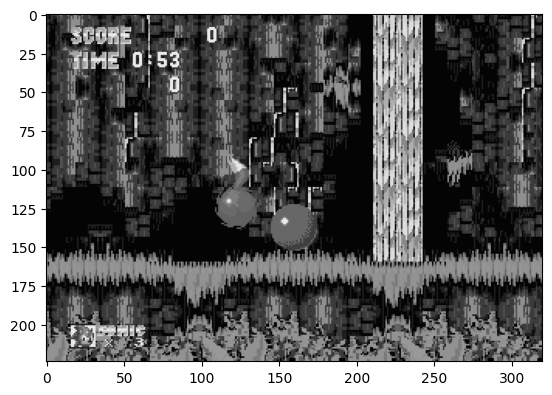

In [41]:
# É essa janela do game que o agente vai aprender a jogar o jogo.

plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)) 

In [21]:
retro.Actions.FILTERED

<Actions.FILTERED: 1>

In [110]:
env.close()

In [12]:
env.observation_space.shape

(84, 84, 1)

In [3]:

BUTTONS = ['B', 'A', 'MODE', 'START', 'UP', 'DOWN', 'LEFT', 'RIGHT', 'C', 'Y', 'X', 'Z']

In [4]:
class Sonic(Env):
    def __init__(self):
        super().__init__()
        #travando o movimento do Sonic

        self.actions = [
            [],                    # Nada
            ['RIGHT'],             # Andar para frente
            ['LEFT'],              # Voltar
            ['A'],                 # Pular
            ['RIGHT', 'A'],        # Andar + Pular
            ['DOWN'],              # Agachar
            ['DOWN', 'A'],         # Spindash
            ['LEFT', 'A'],         # Voltar + Pular
        ]
        self._actions = []
        for combo in self.actions:
            arr = np.array([False] * len(BUTTONS))
            for btn in combo:
                arr[BUTTONS.index(btn)] = True
            self._actions.append(arr)

        self.action_space = Discrete(len(self._actions))





        #Fazendo a scaling da janela
        self.observation_space = Box(low = 0 , high = 255, shape =(84, 84, 1), dtype= np.uint8)
       
        

        #Criando a instancia do game
        self.game = retro.make(game='SonicAndKnuckles3-Genesis', use_restricted_actions = retro.Actions.FILTERED)
       
       
    def step(self, action):
        real_moves = self._actions[action]
        obs, _, done, info = self.game.step(real_moves)

        # Processa a observação
        obs = self.preprocess(obs)

        frame_delta = (obs - self.previous_frame) * 100
        self.previous_frame = obs


        v = info['x'] - self.x                      # avanço horizontal
        c = -0.1                                   # leve penalidade por tempo (evita ficar parado)
        d = -5 if info['lives'] < self.lives else 0  # penalidade forte por morrer

        reward = v * 0.01 + c + d                   # combinação escalada

        # --- Recompensa por coletar anéis ---
        delta_rings = info['rings'] - self.rings
        if delta_rings > 0:
            reward += delta_rings * 0.01
        elif delta_rings < 0:
            reward -= abs(delta_rings) * 0.01

        # --- Recompensa por aumento de score ---
        delta_score = info['score'] - self.score
        reward += delta_score * 0.0005

        # --- Recompensa por fim de fase ---
        reward += info.get('level_end_bonus', 0) * 0.0005

        # --- Verificação de travamento ---
        delta_x = info['x'] - self.x
        if delta_x > 0:
            self.stuck_steps = 0
        else:
            self.stuck_steps += 1

        if self.stuck_steps >= 900:
            reward -= 0.2  # penalidade por ficar parado muito tempo

        if self.stuck_steps >= 1200:
            done = True   # finaliza episódio se travado muito tempo

        # --- Atualização dos estados ---
        self.x = info['x']
        self.rings = info['rings']
        self.score = info['score']
        self.lives = info['lives']
        
        
        return frame_delta, reward, done, info



      
    def render(self, *args, **kwargs):
        frame = self.game.get_screen()
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  # retro retorna RGB, OpenCV espera BGR
        cv2.imshow("Sonic", frame)
        cv2.waitKey(1)

    def reset(self, *, seed = None, options = None):
        #retorna o primeiro frame
        obs = self.game.reset()
        obs = self.preprocess(obs)
        
        #processa 
        self.previous_frame = obs
        #score delta (score do delta do frame - score do frame que foi)
        self.lives = 3
        self.x = 0 
        self.rings = 0
        self.score = 0 
        self.stuck_steps = 0
        self.delta_max_x = 0


        return obs
    
     
    def preprocess(self,observation):
        #grayscaling
        gray = cv2.cvtColor(observation,cv2.COLOR_BGR2GRAY)

        #resize
        resize = cv2.resize(gray, (84,84), interpolation= cv2.INTER_CUBIC)

        #add the channels value (volta pro original)
        channels = np.reshape(resize,(84,84,1))
        return channels
    

    def close(self):
        self.game.close()

Warper de memory

In [5]:
class StickyActionWrapper(gym.Wrapper):
    def __init__(self, env, repeat=4):
        super().__init__(env)
        self.repeat = repeat
        self.last_action = None

    def step(self, action):
        total_reward = 0
        done = False
        for _ in range(self.repeat):
            obs, reward, done, info = self.env.step(action if self.last_action is None else self.last_action)
            total_reward += reward
            if done:
                break
        self.last_action = action
        return obs, total_reward, done, info

    def reset(self, **kwargs):
        self.last_action = None
        return self.env.reset(**kwargs)


Vendo o game rodar randomicamente

In [12]:
env.close()

In [8]:
env = Sonic()


--- Iniciando Episódio 1 ---
Fim do Episódio 1: Limite de tempo (5 minutos) atingido!
Recompensa Total: -361.17
Informações do episódio: {'x': 8874, 'lives': 3, 'level_end_bonus': 0, 'rings': 7, 'score': 30, 'zone': 0, 'act': 0, 'screen_x_end': 24576, 'screen_y': 1061, 'y': 1152, 'screen_x': 8714, 'special_stage': 0}


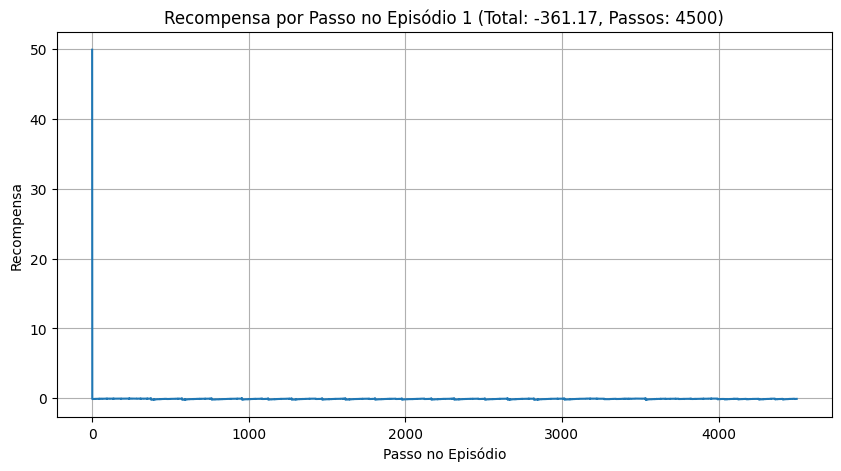


--- Iniciando Episódio 2 ---


KeyboardInterrupt: 

In [6]:
env = Sonic()
#anda e pula
POSSIBLE_ACTIONS_INDICES = [1, 4] # Andar para frente ou andar e pular

num_episodes = 5
all_episode_rewards = []


MAX_STEPS_PER_EPISODE = 4500 

for episode in range(num_episodes):
    obs = env.reset()
    done = False
    episode_reward = 0
    rewards_history = []
    current_steps = 0 # Contador de passos para o limite de tempo

    print(f"\n--- Iniciando Episódio {episode + 1} ---")
    #duração máxima de +-5 minutos
    while not done and current_steps < MAX_STEPS_PER_EPISODE: 
        env.render()
        action_to_take_index = np.random.choice(POSSIBLE_ACTIONS_INDICES) 
        
        obs, reward, done, info = env.step(action_to_take_index)
        
        episode_reward += reward
        rewards_history.append(reward)
        current_steps += 1 
        time.sleep(0.1)
        if done or current_steps >= MAX_STEPS_PER_EPISODE: 
            if current_steps >= MAX_STEPS_PER_EPISODE and not done:
                print(f"Fim do Episódio {episode + 1}: Limite de tempo (5 minutos) atingido!")
                done = True # Garante que o loop interno pare
            else:
                print(f"Fim do Episódio {episode + 1}: Condição de fim de jogo atingida.")
            
            print(f"Recompensa Total: {episode_reward:.2f}")
            print(f"Informações do episódio: {info}")
            all_episode_rewards.append(rewards_history)
            
            plt.figure(figsize=(10, 5))
            plt.plot(rewards_history)
            plt.title(f'Recompensa por Passo no Episódio {episode + 1} (Total: {episode_reward:.2f}, Passos: {current_steps})')
            plt.xlabel('Passo no Episódio')
            plt.ylabel('Recompensa')
            plt.grid(True)
            plt.show()

env.close()
print("\nTodos os episódios concluídos.")

cv2.destroyAllWindows()


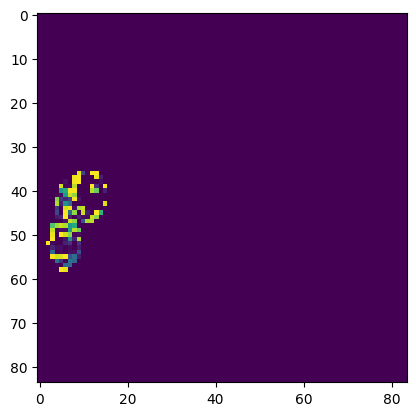

In [8]:
plt.imshow(obs)

# Hyper parameters tunning

In [6]:
#importing the optmizations frame
import optuna 
#PPO for RL
from stable_baselines3 import PPO
#Bringing the eval policy method for metric calculation
from stable_baselines3.common.evaluation import evaluate_policy
#importing the sb3 monitor for loggin
from stable_baselines3.common.monitor import Monitor
#importing the vec wrappers to vectorize  and frame stack
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack 
import os 


c:\Users\danie\miniconda3\envs\project_sonic\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
LOG_DIR = './logs/'
OPT_DIR = './opt/'

In [8]:
#Function to return test hyperparamenters - define the object function

def optimize_ppo(trial):
        return {
        'n_steps': trial.suggest_categorical('n_steps', [2048, 4096, 8192]),
        'gamma': trial.suggest_float('gamma', 0.8, 0.9999),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 1e-4, log=True),
        'clip_range': trial.suggest_float('clip_range', 0.1, 0.4),
        'gae_lambda': trial.suggest_float('gae_lambda', 0.8, 0.99)
    }

Mudar os n_eval_episodes, n_trail, n_jobs abaixo e o timesteps

In [9]:
def optimize_agent(trial):
  #  try:
       # Sugestão: se LOG_DIR e OPT_DIR são globais, certifique-se de defini-los antes
    model_params = optimize_ppo(trial)  # função que sugere hiperparâmetros

    # Criação do ambiente personalizado
    env = Sonic()
    env = Monitor(env, LOG_DIR)  # salva estatísticas
    # DummyVecEnv recebe uma lista de callables que retornam o env
    env = DummyVecEnv([lambda: env])
    env = VecFrameStack(env, 4, channels_order='last')  # empilhamento de frames

    # Criação do modelo com os parâmetros sugeridos
    model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
    model.learn(total_timesteps= 10000000)

    # Avaliação da performance do modelo
    mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5)  # typo corrigido

    env.close()

    SAVE_PATH = os.path.join(OPT_DIR, f'trial_{trial.number}_best_model')
    model.save(SAVE_PATH)

    return mean_reward

In [11]:
env.close()

NameError: name 'env' is not defined

In [12]:
env = Sonic()

In [12]:
assert isinstance(env, Env)  # Deve passar sem erro

Escolhendo os hyperparametros

In [22]:
study = optuna.create_study(direction='maximize')
study.optimize(optimize_agent, n_trials=10, n_jobs=1, show_progress_bar=True)

[I 2025-06-08 14:25:11,228] A new study created in memory with name: no-name-33f5b6ef-79b8-42ea-aebe-2003f692716e
Best trial: 0. Best value: 1.46458e+08:  10%|█         | 1/10 [27:14<4:05:14, 1634.97s/it]

[I 2025-06-08 14:52:26,199] Trial 0 finished with value: 146458296.3999 and parameters: {'n_steps': 8192, 'gamma': 0.8533344338423227, 'learning_rate': 1.5150925028289199e-05, 'clip_range': 0.11672102964526099, 'gae_lambda': 0.9622025719745615}. Best is trial 0 with value: 146458296.3999.


Best trial: 0. Best value: 1.46458e+08:  20%|██        | 2/10 [54:11<3:36:34, 1624.30s/it]

[I 2025-06-08 15:19:23,028] Trial 1 finished with value: 110286288.80018301 and parameters: {'n_steps': 2048, 'gamma': 0.8798421222520993, 'learning_rate': 1.1497238915171259e-05, 'clip_range': 0.34805439931425153, 'gae_lambda': 0.8998567830983492}. Best is trial 0 with value: 146458296.3999.


Best trial: 0. Best value: 1.46458e+08:  30%|███       | 3/10 [1:20:34<3:07:16, 1605.25s/it]

[I 2025-06-08 15:45:45,613] Trial 2 finished with value: 146458296.3999 and parameters: {'n_steps': 8192, 'gamma': 0.8245689098275106, 'learning_rate': 1.0216447254073992e-05, 'clip_range': 0.3630505487953931, 'gae_lambda': 0.9202149943780509}. Best is trial 0 with value: 146458296.3999.


Best trial: 0. Best value: 1.46458e+08:  40%|████      | 4/10 [1:49:13<2:45:00, 1650.10s/it]

[I 2025-06-08 16:14:24,469] Trial 3 finished with value: 110286288.80018301 and parameters: {'n_steps': 4096, 'gamma': 0.9179516089091997, 'learning_rate': 1.1278961331994101e-05, 'clip_range': 0.25337193141217634, 'gae_lambda': 0.8419382601634768}. Best is trial 0 with value: 146458296.3999.


Best trial: 0. Best value: 1.46458e+08:  50%|█████     | 5/10 [2:16:49<2:17:41, 1652.24s/it]

[I 2025-06-08 16:42:00,489] Trial 4 finished with value: 110286288.80018301 and parameters: {'n_steps': 4096, 'gamma': 0.9089799579127307, 'learning_rate': 1.4451651257743361e-05, 'clip_range': 0.23137389701826702, 'gae_lambda': 0.8045477398628241}. Best is trial 0 with value: 146458296.3999.


Best trial: 0. Best value: 1.46458e+08:  60%|██████    | 6/10 [2:46:34<1:53:09, 1697.40s/it]

[I 2025-06-08 17:11:45,562] Trial 5 finished with value: 110286288.80018301 and parameters: {'n_steps': 2048, 'gamma': 0.8469302231457378, 'learning_rate': 2.3843270699565948e-05, 'clip_range': 0.13620539171057447, 'gae_lambda': 0.9319772267586144}. Best is trial 0 with value: 146458296.3999.


Best trial: 0. Best value: 1.46458e+08:  70%|███████   | 7/10 [3:13:45<1:23:46, 1675.62s/it]

[I 2025-06-08 17:38:56,328] Trial 6 finished with value: 107799164.599825 and parameters: {'n_steps': 8192, 'gamma': 0.8001033303268112, 'learning_rate': 4.3854464231636365e-05, 'clip_range': 0.2133955653752014, 'gae_lambda': 0.9069122333917411}. Best is trial 0 with value: 146458296.3999.


Best trial: 0. Best value: 1.46458e+08:  80%|████████  | 8/10 [3:45:48<58:29, 1754.63s/it]  

[I 2025-06-08 18:11:00,135] Trial 7 finished with value: 146458296.3999 and parameters: {'n_steps': 4096, 'gamma': 0.9860141266275587, 'learning_rate': 9.599962089644606e-05, 'clip_range': 0.21946938815488384, 'gae_lambda': 0.8872155454968802}. Best is trial 0 with value: 146458296.3999.


Best trial: 0. Best value: 1.46458e+08:  90%|█████████ | 9/10 [4:30:40<34:07, 2047.49s/it]

[I 2025-06-08 18:55:51,565] Trial 8 finished with value: 110268281.60018298 and parameters: {'n_steps': 2048, 'gamma': 0.844726071606433, 'learning_rate': 6.836969225886898e-05, 'clip_range': 0.24778594336501733, 'gae_lambda': 0.9365716622704058}. Best is trial 0 with value: 146458296.3999.


Best trial: 0. Best value: 1.46458e+08: 100%|██████████| 10/10 [5:05:52<00:00, 1835.25s/it]

[I 2025-06-08 19:31:03,765] Trial 9 finished with value: 110286288.80018301 and parameters: {'n_steps': 2048, 'gamma': 0.8748325461231465, 'learning_rate': 1.6411293115493827e-05, 'clip_range': 0.18831454586276336, 'gae_lambda': 0.8578727299470438}. Best is trial 0 with value: 146458296.3999.


melhor opção oferecida pela optuna

In [ ]:
study.best_trial

NameError: name 'study' is not defined

['1942-Nes', '1943-Nes', '3NinjasKickBack-Genesis', '8Eyes-Nes', 'AaahhRealMonsters-Genesis', 'AbadoxTheDeadlyInnerWar-Nes', 'AcceleBrid-Snes', 'ActRaiser2-Snes', 'ActionPachio-Snes', 'AddamsFamily-GameBoy', 'AddamsFamily-Genesis', 'AddamsFamily-Nes', 'AddamsFamily-Sms', 'AddamsFamily-Snes', 'AddamsFamilyPugsleysScavengerHunt-Nes', 'AddamsFamilyPugsleysScavengerHunt-Snes', 'AdvancedBusterhawkGleylancer-Genesis', 'Adventure-Atari2600', 'AdventureIsland-GameBoy', 'AdventureIsland3-Nes', 'AdventureIslandII-Nes', 'AdventuresOfBatmanAndRobin-Genesis', 'AdventuresOfBayouBilly-Nes', 'AdventuresOfDinoRiki-Nes', 'AdventuresOfDrFranken-Snes', 'AdventuresOfKidKleets-Snes', 'AdventuresOfMightyMax-Genesis', 'AdventuresOfMightyMax-Snes', 'AdventuresOfRockyAndBullwinkleAndFriends-Genesis', 'AdventuresOfRockyAndBullwinkleAndFriends-Nes', 'AdventuresOfRockyAndBullwinkleAndFriends-Snes', 'AdventuresOfStarSaver-GameBoy', 'AdventuresOfYogiBear-Snes', 'AeroFighters-Snes', 'AeroStar-GameBoy', 'AeroTheAcroBa


KeyboardInterrupt



In [10]:
#model_params = study.best_params
#model_params['n_steps'] = 7488
#model_params['learning_rate'] = 5e-7
#model_params
model_params = {'n_steps': 8192, 'gamma': 0.8533344338423227, 'learning_rate': 1.5150925028289199e-05, 'clip_range': 0.11672102964526099, 'gae_lambda': 0.9622025719745615}

In [13]:
print("Tipo do env:", type(env))
print("Módulo base do env:", type(env).__module__)
print("gym.Env é:", gym.Env)

Tipo do env: <class '__main__.Sonic'>
Módulo base do env: __main__
gym.Env é: <class 'gym.core.Env'>


# Chamando o modelo

In [18]:
model = PPO.load(os.path.join(OPT_DIR, 'trial_0_best_model.zip'))

# Setup Callback

In [19]:
from stable_baselines3.common.callbacks import BaseCallback

In [20]:
class TrainAndLogginCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose =1):
        super(TrainAndLogginCallback, self). __init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok= True)

    def _on_step(self):
        if self.n_calls% self.check_freq ==0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [21]:
CHECKPOINT_DIR = './train/'

In [22]:
callback = TrainAndLogginCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

# Training the model


In [14]:
env.close()

In [15]:
# Criação do ambiente personalizado
env = Sonic()
env = StickyActionWrapper(env, repeat=4)
env = Monitor(env, LOG_DIR)  # salva estatísticas
# DummyVecEnv recebe uma lista de callables que retornam o env
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')  # empilhamento de frames


In [16]:
import torch

In [20]:
import torch
print(torch.__version__)
print("CUDA disponível:", torch.cuda.is_available())
print("Dispositivo atual:", torch.cuda.current_device())
print("Nome da GPU:", torch.cuda.get_device_name(0))


2.0.0+cu118
CUDA disponível: True
Dispositivo atual: 0
Nome da GPU: NVIDIA GeForce GTX 1650


Fazendo o decay do ent_coef exploitation Vs.exploration

In [25]:
def linear_schedule(initial_value):
    """
    Retorna uma função que mapeia o progresso (1.0 → 0.0) para um valor escalar.
    """
    def schedule(progress):
        return progress * initial_value
    return schedule

In [26]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, ent_coef=0.01,verbose=1, **model_params)

Using cuda device
Wrapping the env in a VecTransposeImage.


Transfer learning below

In [20]:
model.load(os.path.join(OPT_DIR, 'trial_0_best_model.zip'))

mudar total_timesteps dps


Caso ficar ruim, aumenta os steps e diminui o learning rate 

In [26]:
model.learn(total_timesteps=8000000, callback=callback)

Logging to ./logs/PPO_17
-----------------------------
| time/              |      |
|    fps             | 164  |
|    iterations      | 1    |
|    time_elapsed    | 49   |
|    total_timesteps | 8192 |
-----------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.19e+04     |
|    ep_rew_mean          | -4.81e+03    |
| time/                   |              |
|    fps                  | 141          |
|    iterations           | 2            |
|    time_elapsed         | 115          |
|    total_timesteps      | 16384        |
| train/                  |              |
|    approx_kl            | 0.0032458436 |
|    clip_fraction        | 0.0593       |
|    clip_range           | 0.117        |
|    entropy_loss         | -2.08        |
|    explained_variance   | -0.0754      |
|    learning_rate        | 1.52e-05     |
|    loss                 | 0.024        |
|    n_updates            | 10    

In [17]:
model = PPO.load('./train/best_model_8010000.zip')

mudar dps abaixo

In [ ]:
mean_reward, _ = evaluate_policy(model,env,render = True , n_eval_episodes= 5 )

In [ ]:
mean_reward

Testando o modelo

In [ ]:
obs = env.reset()

done = False

while True:  # Loop principal do jogo
        env.render()  # Isso deve ser chamado em CADA frame
        
        # Toma uma ação aleatória
        action = model.predict(obs)[0]
        obs, reward, done, info = env.step(action)
        time.sleep(0.001)
        
        print(f"Recompensa: {reward}")
        
        if done:
            print("Fim do jogo! Informações:")
            print(info)
            obs = env.reset()
            done = False

env.close()
print(info)

## Zig-Zag

In [18]:
class SonicZigZag(Sonic):
    def __init__(self):
        super().__init__()
        #fecha se não dá prob
        self.game.close() 
        #Criando a instancia do game
        self.game = retro.make(game='SonicAndKnuckles3-Genesis', use_restricted_actions = retro.Actions.FILTERED)

        self.max_x = 0
        self.jump_counter = 0
        
    
    def in_pre_trampoline_zone(self, info):
        x, y = info['x'], info['y']
        return 10600 <= x <= 10615 and 1110 <= y <= 1122

    def in_post_trampoline_zone(self, info):
        return info['x'] >= 10630

    def in_zigzag_zone(self, info):
        return 11100 <= info['x'] <= 11400 and info['y'] <= 970
    


    def step(self, action):
        real_moves = self._actions[action]
        obs, _, done, info = self.game.step(real_moves)

        # Processa a observação
        obs = self.preprocess(obs)
        frame_delta = (obs - self.previous_frame) * 100
        self.previous_frame = obs

        # Recompensa base
        v = info['x'] - self.x
        c = -0.1
        d = -5 if info['lives'] < self.lives else 0
        reward = v * 0.01 + c + d

        # --- Recompensas padrão ---
        delta_rings = info['rings'] - self.rings
        if delta_rings > 0:
            reward += delta_rings * 0.01
        elif delta_rings < 0:
            reward -= abs(delta_rings) * 0.01

        delta_score = info['score'] - self.score
        reward += delta_score * 0.0005

        reward += info.get('level_end_bonus', 0) * 0.0005

        # --- Zona pré-trampolim ---
        if self.in_pre_trampoline_zone(info):
            if real_moves[BUTTONS.index('LEFT')]:
                reward += 0.2
            else:
                reward -= 0.05

        # --- Zona pós-trampolim / Zig-zag ---
        if self.in_zigzag_zone(info):
            segurando_right = real_moves[BUTTONS.index('RIGHT')]
            pulando = (
                real_moves[BUTTONS.index('A')] 
                
            )

            
            if segurando_right:
                reward += 0.3
            
            else:
                reward -= 0.5

            if pulando:
                reward -= 0.5

        # --- Verificação de travamento ---
        delta_x = info['x'] - self.x
        if delta_x > 0:
            self.stuck_steps = 0
        else:
            self.stuck_steps += 1

        if self.stuck_steps >= 900:
            reward -= 0.2

        if self.stuck_steps >= 1200:
            done = True

        # Atualização de estados
        self.x = info['x']
        self.rings = info['rings']
        self.score = info['score']
        self.lives = info['lives']

        return frame_delta, reward, done, info

    
    def close(self):
        self.game.close()


In [23]:
env.close()

In [ ]:
env = SonicZigZag()
obs = env.reset()

done = False

try:
    while True:
        env.render()
        action = env.action_space.sample()  # Ou sua lógica de controle

        obs, reward, done, info = env.step(action)
        print(f"Reward: {reward}")

        if done:
            print("Episódio terminou, resetando...")
            obs = env.reset()
            done = False
finally:
    env.close()
    cv2.destroyAllWindows()


Treinando o sonic zig-zag, vamos chamar as instancias do modelo

In [45]:
LOG_DIR = './logs_zigzag/'
OPT_DIR = './opt_zigzag/'

In [46]:
def optimize_agent(trial):
  #  try:
       # Sugestão: se LOG_DIR e OPT_DIR são globais, certifique-se de defini-los antes
    model_params = optimize_ppo(trial)  # função que sugere hiperparâmetros

    # Criação do ambiente personalizado
    env = SonicZigZag()
    env = Monitor(env, LOG_DIR)  # salva estatísticas
    # DummyVecEnv recebe uma lista de callables que retornam o env
    env = DummyVecEnv([lambda: env])
    env = VecFrameStack(env, 4, channels_order='last')  # empilhamento de frames

    # Criação do modelo com os parâmetros sugeridos
    model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
    model.learn(total_timesteps= 200000)

    # Avaliação da performance do modelo
    mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5)  # typo corrigido

    env.close()

    SAVE_PATH = os.path.join(OPT_DIR, f'trial_{trial.number}_best_model_zigzag')
    model.save(SAVE_PATH)

    return mean_reward

In [30]:
model = PPO.load(os.path.join(OPT_DIR, 'trial_0_best_model.zip'))

In [31]:
class TrainAndLogginCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose =1):
        super(TrainAndLogginCallback, self). __init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok= True)

    def _on_step(self):
        if self.n_calls% self.check_freq ==0:
            model_path = os.path.join(self.save_path, 'best_model_{}_zigzag'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [34]:
CHECKPOINT_DIR = './train_zigs/'

In [35]:
callback = TrainAndLogginCallback(check_freq=5000, save_path=CHECKPOINT_DIR)

In [21]:
env.close()

In [64]:
# Criação do ambiente personalizado
env = SonicZigZag()
env = StickyActionWrapper(env, repeat=5)
env = Monitor(env, LOG_DIR)  # salva estatísticas
# DummyVecEnv recebe uma lista de callables que retornam o env
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')  # empilhamento de frames

In [51]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, ent_coef=0.01,verbose=1, **model_params)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [65]:

model = PPO.load('./train/best_model_8010000.zip',  env=env)

Wrapping the env in a VecTransposeImage.


In [68]:
model.learn(total_timesteps=5000000, callback=callback)

Logging to ./logs/PPO_27


-----------------------------
| time/              |      |
|    fps             | 134  |
|    iterations      | 1    |
|    time_elapsed    | 61   |
|    total_timesteps | 8192 |
-----------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 3.45e+03    |
|    ep_rew_mean          | -1.67e+03   |
| time/                   |             |
|    fps                  | 120         |
|    iterations           | 2           |
|    time_elapsed         | 136         |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.012191325 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.117       |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.746       |
|    learning_rate        | 1.52e-05    |
|    loss                 | -0.0464     |
|    n_updates            | 13430       |
|    policy_gradient_loss | -0.021

In [19]:
model = PPO.load('./train_zigs/best_model_13030000_zigzag')

Vendo o jogo rodar

In [22]:
model_path = './train_zigs/best_model_13030000_zigzag'
try:
    model = PPO.load(model_path)
    print(f"Model loaded successfully from {model_path}")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Please ensure the model file exists at the specified path and is not corrupted.")
    exit() 


env = Sonic()


MAX_STEPS_PER_EPISODE = 4500 

print("\n--- Starting Model Evaluation Episode ---")

obs = env.reset()
done = False
episode_reward = 0
rewards_history = []
current_steps = 0

while not done and current_steps < MAX_STEPS_PER_EPISODE:
    env.render() # Display the game

    
    action_index, _states = model.predict(obs) 
    
    
    obs, reward, done, info = env.step(action_index.item() if isinstance(action_index, np.ndarray) else action_index) # .item() extracts scalar from numpy array if needed
    
    episode_reward += reward
    rewards_history.append(reward)
    current_steps += 1
     time.sleep(0.001)

    if done or current_steps >= MAX_STEPS_PER_EPISODE:
        if current_steps >= MAX_STEPS_PER_EPISODE and not done:
            print(f"Episode ended: Time limit (5 minutes) reached!")
        else:
            print(f"Episode ended: Game over condition met.")
        
        print(f"Total Reward: {episode_reward:.2f}")
        print(f"Episode Info: {info}")
        
        plt.figure(figsize=(10, 5))
        plt.plot(rewards_history)
        plt.title(f'Reward per Step for Trained Model (Total: {episode_reward:.2f}, Steps: {current_steps})')
        plt.xlabel('Step in Episode')
        plt.ylabel('Reward')
        plt.grid(True)
        plt.show()

# Close the environment and OpenCV windows
env.close()

Model loaded successfully from ./train_zigs/best_model_13030000_zigzag

--- Starting Model Evaluation Episode ---


ValueError: Error: Unexpected observation shape (84, 84, 1) for Box environment, please use (4, 84, 84) or (n_env, 4, 84, 84) for the observation shape.

: 

In [57]:
mean_reward, _ = evaluate_policy(model,env,render = True , n_eval_episodes= 1 )

: 

In [ ]:
mean_reward